## Use Spark to explore data

In [ ]:
%%pyspark
df = spark.read.load('abfss://files@datalakesfmo6v9.dfs.core.windows.net/sales/orders/*.csv', format='csv'
## If header exists uncomment line below
##, header=True
)
display(df.limit(100))

In [4]:
%%pyspark
from pyspark.sql.types import *
from pyspark.sql.functions import *

orderSchema = StructType([
    StructField("SalesOrderNumber", StringType()),
    StructField("SalesOrderLineNumber", IntegerType()),
    StructField("OrderDate", DateType()),
    StructField("CustomerName", StringType()),
    StructField("Email", StringType()),
    StructField("Item", StringType()),
    StructField("Quantity", IntegerType()),
    StructField("UnitPrice", FloatType()),
    StructField("Tax", FloatType())
    ])

df = spark.read.load('abfss://files@datalakesfmo6v9.dfs.core.windows.net/sales/orders/*.csv', format='csv', schema=orderSchema)
display(df.limit(100))

StatementMeta(sparksfmo6v9, 0, 5, Finished, Available)

SynapseWidget(Synapse.DataFrame, 1455dd53-8762-47f0-a8bd-2b00df6e4109)

In [5]:
df.printSchema()

StatementMeta(sparksfmo6v9, 0, 6, Finished, Available)

root
 |-- SalesOrderNumber: string (nullable = true)
 |-- SalesOrderLineNumber: integer (nullable = true)
 |-- OrderDate: date (nullable = true)
 |-- CustomerName: string (nullable = true)
 |-- Email: string (nullable = true)
 |-- Item: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- UnitPrice: float (nullable = true)
 |-- Tax: float (nullable = true)



In [8]:
customers = df.select("CustomerName", "Email").where(df['Item']=='Road-250 Red, 52')
print(customers.count())
print(customers.distinct().count())
display(customers.distinct())

StatementMeta(sparksfmo6v9, 0, 9, Finished, Available)

133
133


SynapseWidget(Synapse.DataFrame, cd5cc632-e59b-49aa-a84c-2a1370a8df8a)

In [7]:
productSales = df.select("Item", "Quantity").groupBy("Item").sum()
display(productSales)

StatementMeta(sparksfmo6v9, 0, 8, Finished, Available)

SynapseWidget(Synapse.DataFrame, df3114fe-5034-4f04-b962-7496725ff3ee)

## Query data using Spark SQL
[Spark SQL, DataFrames and Datasets Guide](https://spark.apache.org/docs/2.2.0/sql-programming-guide.html)


In [9]:
df.createOrReplaceTempView("salesorders")

spark_df = spark.sql("SELECT * FROM salesorders")
display(spark_df)

StatementMeta(sparksfmo6v9, 0, 10, Finished, Available)

SynapseWidget(Synapse.DataFrame, ce915826-3f01-438f-b67e-5fbc788aeade)

In [10]:
%%sql
SELECT YEAR(OrderDate) AS OrderYear,
       SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue
FROM salesorders
GROUP BY YEAR(OrderDate)
ORDER BY OrderYear;

StatementMeta(sparksfmo6v9, 0, 11, Finished, Available)

<Spark SQL result set with 3 rows and 2 fields>

In [11]:
%%sql
SELECT * FROM salesorders

StatementMeta(sparksfmo6v9, 0, 12, Finished, Available)

<Spark SQL result set with 1000 rows and 9 fields>

In [12]:
sqlQuery = "SELECT CAST(YEAR(OrderDate) AS CHAR(4)) AS OrderYear, \
                SUM((UnitPrice * Quantity) + Tax) AS GrossRevenue \
            FROM salesorders \
            GROUP BY CAST(YEAR(OrderDate) AS CHAR(4)) \
            ORDER BY OrderYear"
df_spark = spark.sql(sqlQuery)
df_spark.show()

StatementMeta(sparksfmo6v9, 0, 13, Finished, Available)

+---------+--------------------+
|OrderYear|        GrossRevenue|
+---------+--------------------+
|     2019|   4172169.969970703|
|     2020|   6882259.268127441|
|     2021|1.1547835291696548E7|
+---------+--------------------+



Visualize data with Spark: **matplotlib** & **seaborn**


StatementMeta(sparksfmo6v9, 0, 19, Finished, Available)

<Figure size 432x288 with 0 Axes>

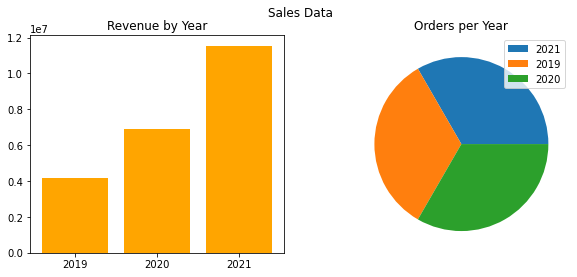

In [18]:
# Clear the plot area
plt.clf()

# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of revenue by year on the first axis
ax[0].bar(x=df_sales['OrderYear'], height=df_sales['GrossRevenue'], color='orange')
ax[0].set_title('Revenue by Year')

# Create a pie chart of yearly order counts on the second axis
yearly_counts = df_sales['OrderYear'].value_counts()
ax[1].pie(yearly_counts)
ax[1].set_title('Orders per Year')
ax[1].legend(yearly_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Sales Data')

# Show the figure
plt.show()

StatementMeta(sparksfmo6v9, 0, 20, Finished, Available)

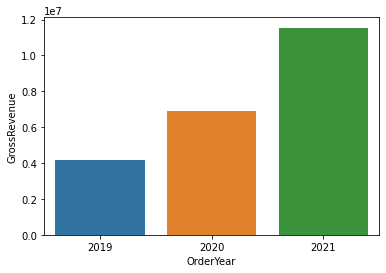

In [19]:
import seaborn as sns

# Clear the plot area
plt.clf()

# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()

StatementMeta(sparksfmo6v9, 0, 21, Finished, Available)

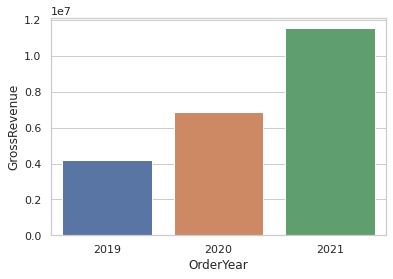

In [20]:
# Clear the plot area
plt.clf()

# Set the visual theme for seaborn
sns.set_theme(style="whitegrid")

# Create a bar chart
ax = sns.barplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()

StatementMeta(sparksfmo6v9, 0, 22, Finished, Available)

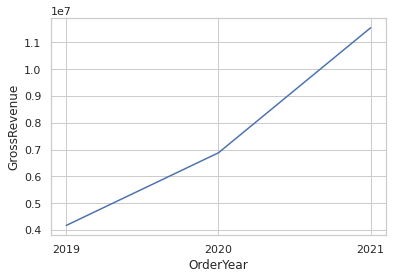

In [21]:
# Clear the plot area
plt.clf()

# Create a bar chart
ax = sns.lineplot(x="OrderYear", y="GrossRevenue", data=df_sales)
plt.show()